# Predicting Boston Housing Prices

In [54]:
# Import libraries necessary for this project
import numpy as np, pandas as pd
from sklearn.cross_validation import ShuffleSplit

import warnings
warnings.filterwarnings('ignore')

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
from matplotlib import pyplot as plt
%matplotlib inline


# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


#### View and explore the data set provided

In [55]:
data.head(1)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0


In [56]:
data.tail(1)

,RM,LSTAT,PTRATIO,MEDV
488,6.03,7.88,21.0,249900.0


In [57]:
data.size

1956

In [58]:
data.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [59]:
data.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [60]:
data.shape

(489, 4)

#### Hence we see that this data has 489 rows and 4 columns.    Each columns is of float data type. 

## Data Exploration 

In [61]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = round(np.mean(prices), 2)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = round(np.std(prices), 2)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.94
Median price $438900.0
Standard deviation of prices: $165171.13


***Question 1 - Feature Observation***    
As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

1. 'RM' is the average number of rooms among homes in the neighborhood.
2. 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
3. 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an ***increase*** in the value of 'MEDV' or a ***decrease*** in the value of 'MEDV'? Justify your answer for each.
Hint: Would you expect a home that has an 'RM' value of 6 be worth more or less than a home that has an 'RM' value of 7?

***Answer:*** Let's Analyze the affect of these variables on the housing prices using the ***scatter plots***. Scatter plots are good to visualize whether increase/decrease in the value of a variable(RM, LSTAT, PTRATIO) affects the other(prices) i.e. they are good to be utilized when we want to see the correlation.

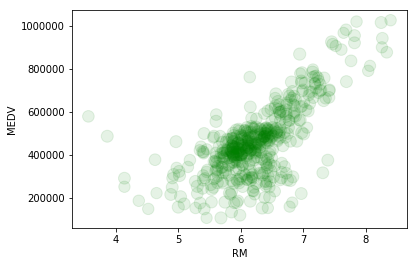

In [72]:
x = np.array(data['RM'])
y = np.array(data['MEDV'])
s = np.random.rand(*x.shape) * 100 + 500

plt.scatter(x, y, s, c="g", alpha=0.1, marker=".")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend(loc=2)
plt.show()

***Plot Summary*** : We see that as the RM value increses form around 5.0 to 8.0 on x-axis, the scatter plots shows ***lot of points takign higher values*** of MEDV i.e. going from around 0.20 million to 1 million(Except some outliers at the left of graph). Hence we can infer that as the RM increses, the price also increases.

This is also intitutive as the average no. of rooms (RM) increases in a house, it's ***price should also go high*** and as RM decreases the prices should go down.

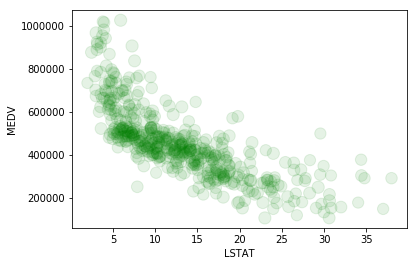

In [73]:
x = np.array(data['LSTAT'])
y = np.array(data['MEDV'])
s = np.random.rand(*x.shape) * 100 + 500

plt.scatter(x, y, s, c="g", alpha=0.1, marker=".")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend(loc=2)
plt.show()

***Plot Summary*** : We see that as the LSTAT value increses form around 5.0 to 35.0 on x-axis, the scatter plots shows ***lot of points takign lower values*** of MEDV i.e. going from around 1 million to 0.2 million(Except some outliers at the right of graph). Hence we can infer that as the LSTAT increses, the price also increases.

This is also intitutive as more there are more no. of poor people living in neighbour hood, and provided that poor people could afford houses of lower cost only, the house ***prices should be lower*** in that neighbour hood and as LSTAT decreases the prices should go high.

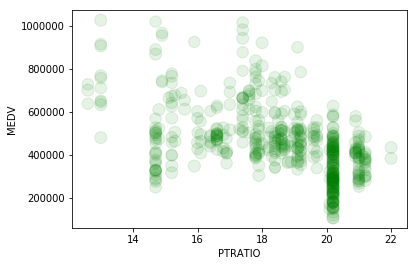

In [68]:
x = np.array(data['PTRATIO'])
y = np.array(data['MEDV'])
s = np.random.rand(*x.shape) * 100 + 500

plt.scatter(x, y, s, c="g", alpha=0.1, marker=".")
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.legend(loc=2)
plt.show()

***Plot Summary*** : Increase in the value of PTRATIO shows points taking lower values of MEDV. Thoguh there is high variance at the PTRATIO = 20. Still we can say that as the PTRATIO increases, the house prices decreases.

This is intitutive as more the no. of students per teacher means the school in the neighbourhood doesn't have proper and sumptuous resources(teachers). Hence people (wanting to place their childrean at better schools) generaly avoid taking houses in that area and the prices of houses are lower.    
Also better(lower) the PTRATI, more is the housing prices.

## Developing a Model 

In [74]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score


***Question 2 - Goodness of Fit***    
Assume that a dataset contains five data points and a model made the following predictions for the target variable:


| True Value | Prediction   |
|------|------|
|   3.0|2.5   |
|  -0.5|0.0   |
|   2.0|	2.1|
|7.0	|7.8|
|   4.2	| 5.3|
	

Run the code cell below to use the performance_metric function and calculate this model's coefficient of determination.

In [75]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


***Hint:*** The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:

1. R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
2. R2 score of 1 means the dependent variable can be predicted from the independent variable.
3. R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An
4. R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.    


***Answer:*** Coefficient of determination, R^2, determines the squared correlation between the actual and the predicted values. A value of 0 indicates that the model always fails to predict the target/actual value, where a value of 1 indicates the model prefectly predicts the target value.

Here, the model's R^2 score of 0.92 which is pretty close to 1.0, Hence the model successfully captured the variation of the dependent variables.

***Implementation: Shuffle and Split Data***    
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.    
Split the data into 80% training and 20% testing.    
Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.    
Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [85]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=33)

# Success
print ("Training and testing split was successful")

Training and testing split was successful


***Question 3 - Training and Testing***    
What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?
Hint: What could go wrong with not having a way to test your model?



***Answer:***    
The biggest intution to split data into training and test data is to simulate how our model will perform on the unknown and future data which it has not seen altogether.

Secondly, it also provides a way to measure the metrics (accuracy, precision, recall, F1 score, r^2 score) etc. on unlearned data(testing data), as these metrics will be biased for the training data as our model has already seen and learned the weights/parameters based on the training data so it's less likely to make mistake on that.

Thridly, we could check the generalization of our model, only if we expose it to unseen in hand data(testing data).

## Analyzing Model Performance


In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

***Learning Curves***
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

Run the code cell below and use these graphs to answer the following question.

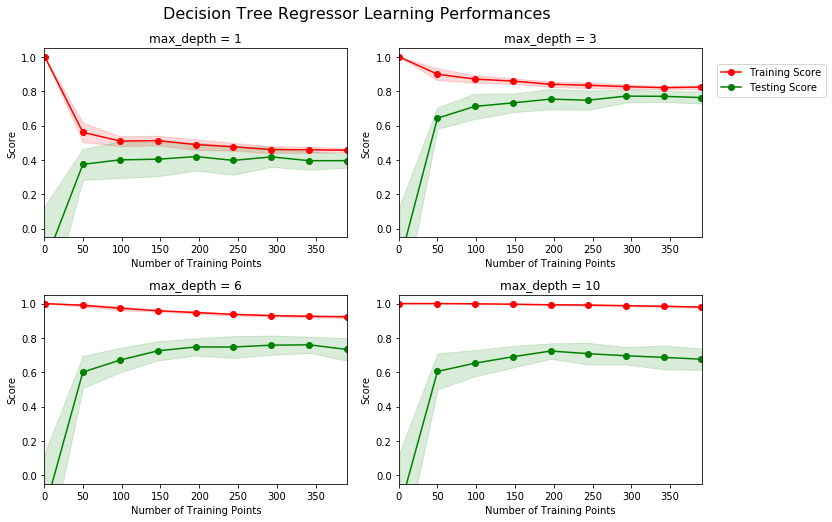

In [86]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

***Question 4 - Learning the Data***    
Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?
Hint: Are the learning curves converging to particular scores?

***Answer*** : The graph with the max_depth = 3 is the best model here. Here training and the testing scores are converging which is not the case with those with depths 6 and 10.    
Also in the case of depth=1, though they are converging but the training score is lesser that that for depth of 3.

I think that the score of the training curve will ***remain saturated around 0.8*** even if more training points are added as visible from the graph with max_depth = 3.

Having more training points ***wouldn't benefit the model***, as the training as well as testign scores are saturated after 300 points. So around 300 points is a good data size here.

***Complexity Curves***
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the ***learning curves***, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

Run the code cell below and use this graph to answer the following two questions Q5 and Q6.



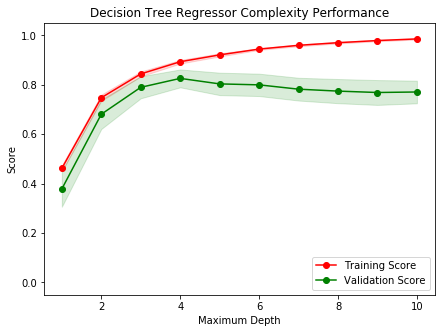

In [87]:
vs.ModelComplexity(X_train, y_train)

***Question 5 - Bias-Variance Tradeoff***    
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?
Hint: How do you know when a model is suffering from high bias or high variance?

***Answer*** : 

When the model is trained with max_depth = 1, then the training score is low, hence the model is not properly learned and it is the case of underfitting. Hence it is suffering from ***high bias.***

When the model is trained with max_depth = 10, then the testign score never touches the training score, hence they don't converge. That means model has over learned the training data and is not able to generalize on the testing data. Hence it is suffering from ***high variance.***

The Visual cues are : 
1. For max_depth = 1, the training score is very less (0.4), hence the predicted model doesn't properly fits the data. That means it has not learned the features from the data properly. Hence this is the case of under fitting and high bias.
2. For max_depth = 10, the training score is good enough (approaching 1.0), But it doens't converge with the testing score(lesser). Hence the model seems to overlearn and is not able to generalize on the testing data.

***Question 6 - Best-Guess Optimal Model***    
Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?

***Answer:*** 

A maximum depth of 4 best generalizes the unseen data, as after that the validation score starts dropping and remains flat afterwards. This is relevant from the regressor complexity performace graph. After the score of 4, the training plot keeps moving upward while the validation graph lowers and remain flat signifying that the model has started over fitting and is not able to generalize any more.

## Evaluating Model Performance

In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.

***Question 7 - Grid Search***    
What is the grid search technique?    
How it can be applied to optimize a learning algorithm?    
Hint: When explaining the Grid Search technique, be sure to touch upon why it is used, what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.    

***Answer:***

1. Grid search is a way to list down all the possible combinations for the hyperparameters in the form of a grid(table). Thus it provides us with the set of all possible combinations of the hyperparameters while deciding a model and it's performance metrics with that set of hyperparameters.

 The possible set of hyperparameters can be depth of the tree(in case of decision trees), degree of the polynomial incase of polynomial model(linear or logistic), Kernel, Gamma & C values in case of SVM etc.

2. The grids or cells in the grid table may contain the performance metrices(F1 score, CV score or R^2 score) etc., thus we can have a over all look over the performance metrics for the exhaustive set of hyperparameter combinations listed in the form of grid table.  

3. One more benefit of it is that after listing all the hyperparameters combination in the grid form, we could parallelise each of the combinations and obtain the performace metrics.

***Question 8 - Cross-Validation***    
What is the k-fold cross-validation training technique?    

What benefit does this technique provide for grid search when optimizing a model?    

***Hint***: When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon using a particular subset of data for training or testing and how k-fold cv could help alleviate that. You can refer to the docs for your answer.

***Answer***:

The k-fold cross-validation training technique is a method to predict how good the learned model is going to perform on the unseen dataset.  In other words, it assesses how well the model is going to generalize on unseen data.     
It breaks the data into K complementary data sets. It trains on one of the data set(training data set) and then validates it on the remaining (testing) data sets. It performs multiple(in genral K) such rounds interchanging the training and testing data sets and finally takes the mean for the final score.

It is better to the other validation methods as the training and testing sets are being interchanged in each run among the K partitions.

The K-fold cross validaton scores can be used at the measure of the perfrmace metrics for a particular combination of hyper parameters in the grid search method. 
It is better to other scores as it recycles among the K data sets. ***Thus if a particular set(training set) is little bit skewed or uneven or contains anomalies, then it'll be averaged out over K runs.***

### Implementation: Fitting a Model


Your final implementation requires that you bring everything together and train a model using the decision tree algorithm. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called supervised learning algorithms.    

In addition, you will find your implementation is using ShuffleSplit() for an alternative form of cross-validation (see the 'cv_sets' variable). While it is not the K-Fold cross-validation technique you describe in Question 8, this type of cross-validation technique is just as useful!. The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.
    
Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18. For the fit_model function in the code cell below, you will need to implement the following:
    
1. Use DecisionTreeRegressor from sklearn.tree to create a decision tree regressor object.        
    - Assign this object to the 'regressor' variable.    
- Create a dictionary for 'max_depth' with the values from 1 to 10, and assign this to the 'params' variable.    
- Use make_scorer from sklearn.metrics to create a scoring function object.    
    - Pass the performance_metric function as a parameter to the object.    
    - Assign this scoring function to the 'scoring_fnc' variable.    
- Use GridSearchCV from sklearn.grid_search to create a grid search object.    
    - Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.    
    - Assign the GridSearchCV object to the 'grid' variable.    

In [100]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

***Making Predictions***    
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

***Question 9 - Optimal Model***    

    - What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [101]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


***Hint:*** The answer comes from the output of the code snipped above.

***Answer:***

Hence we see that the rtree with the depth of 4 is the most optimized one which is obvious form the regressor performance complexity graph from question 6. More over, it clarifies the doubt that maximum validator is at 4 instead of 3 depth.

***Question 10 - Predicting Selling Prices***    
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:


| Feature | Client 1   |Client 2|Client 3|
|------|------|------|------|
|Total number of rooms in home|	5 rooms|	4 rooms|	8 rooms|
|Neighborhood poverty level (as %)	|17%	|32%	|3%|
|Student-teacher ratio of nearby schools	|15-to-1	|22-to-1	|12-to-1|


    1. What price would you recommend each client sell his/her home at?
    2. Do these prices seem reasonable given the values for the respective features?
Hint: Use the statistics you calculated in the Data Exploration section to help justify your response. Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [102]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))


Predicted selling price for Client 1's home: $409,400.00
Predicted selling price for Client 2's home: $229,682.35
Predicted selling price for Client 3's home: $938,053.85


***Answer:***    
Note: Rounding off the prices, so that little negotiation is possible :-)
1. For Client1 : 410k should be good suggestion taking into acoount a little negotiation. They have 5 rooms (slightly below mean value),very good 17 % neighbourhood poverty level(lower than mean) and average PTRATIO (15-1).
2. For Client2 : 229K should be reasonable bid. It has lowest no. of available rooms(4), High 32% poverty level in neighbour hood and also bad PTRATIO(22-1).
3. For Client3 : 940K should be good suggestion taking into acoount a little negotiation. It has most available rooms (8), least poor neighbourhood (3%) and very good PTRATIO.

***Sensitivity***     
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

Run the code cell below to run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.

In [103]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


***Question 11 - Applicability***    
     1. In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.
Hint: Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:

    1. How relevant today is data that was collected from 1978? How important is inflation?
    2. Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
    3. Is the model robust enough to make consistent predictions?
    4. Would data collected in an urban city like Boston be applicable in a rural city?
    5. Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?
***Answer:***



The trained model as it is won't be much useful in it's current form as : 
1. It ***might not be relevant today even after considering the inflation rate***. The inflation rate might not be conidering multiple facts like industrialisation, rate of Urbanisation, Job opportunities in that area, which could actually boom the prices even more than what is projectd in the supplied data. So for deploying in real world, ***we need actual data and not the inflated one***.

2. The Features present in the data ***might not be sufficient to describe a home***. Some factors like the residential living area, available floors, amenities like garden, greenery, playing court, swimming pool etc. definately affects the final price.
3. The model might not be ***robust enough to make the consistnet prediction***. It should be trained with the current continuous data periodically so that it can keep up with the changing price graph as the supply and demand also affects the prices a lot. Also, it might required more/lesser features to be trained on in future based on the circumstances at that time.
4. The data collected in an urban city like Boston ***might not be applicable in a rural city***. Actually the urban city provides a lot of amenities and facilities like proximity to legal institutions, educational hub, commerce hub, transportational connectivity etc. These all factors impact a lot for the housing prices.
5. It's ***not fair*** to judge the price of an individual home based on the characteristics of the entire neighborhood. As it would generalize a particualr home which could be good in so many other features.